<h1><center>Chapter3: Classification</center></h1>
<h2><center>Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition <br>by Aurélien Géron</center></h2>
<h2><center>Exercies</center></h2>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [3]:
import numpy as np

# label is a string
# Most ML algorithms take numeric values => cast y to int
y = y.astype(np.uint8)

In [4]:
# split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(X_train, y_train):
#     strat_X_train, strat_y_train = X_train[train_index], y_train[train_index]
#     start_X_test, strat_y_test = X_train[test_index], y_train[test_index]

<h2>1. An MNIST Classifier With Over 97% Accuracy</h2>

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = [{
    'n_neighbors': [3, 4, 5],
    'weights': ['uniform', 'distance'],
}]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, hyperparameters, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
# standardization (standard deviation=1, mean=0)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
grid_search.fit(X_train_scaled, y_train)
y_pred_scaled = grid_search.predict(X_test, y_test)
accuracy_score(y_pred_scaled, y_test)

<h2>2. Data Augmentation</h2>

In [6]:
from scipy.ndimage.interpolation import shift

In [17]:
def shift_image_by_pixel(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode='constant')
    return shifted_image.reshape([-1])

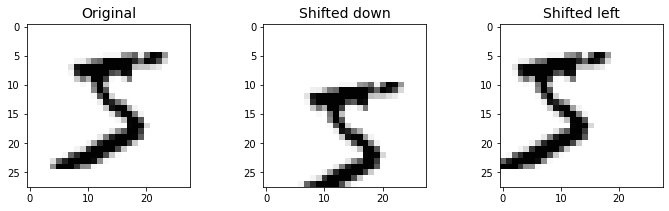

In [28]:
import matplotlib.pyplot as plt

image = X_train[0]
shifted_image_down = shift_image_by_pixel(image, 0, 5) # + = down, - = up
shifted_image_left = shift_image_by_pixel(image, -5, 0) # + = right, - = left

plt.figure(figsize=(12,3))
plt.subplot(1, 3, 1)
plt.title("Original", fontsize=14)
# interpolation = 'nearest' works well when a small image is scaled up.
plt.imshow(image.reshape(28, 28), interpolation='nearest', cmap='Greys')

plt.subplot(1, 3, 2)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation='nearest', cmap='Greys')

plt.subplot(1, 3, 3)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation='nearest', cmap='Greys')

In [29]:
# create for shifted copies
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image_by_pixel(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [30]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)
y_pred = knn_clf.predict(X_test, y_test)
accuracy_score(y_test, y_pred)